# Clustering using Zillow Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np

# explore/ stat
import scipy.stats as stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
from env import host, user, password
import acquire
import summarize
import prepare
import explore

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.unitcnt.value_counts(dropna=False)

1.00    33691
 nan    18451
2.00       26
3.00        1
Name: unitcnt, dtype: int64

In [5]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
summarize.df_summary(df)

In [ ]:
summarize.nulls_by_col(df)

In [ ]:
summarize.nulls_by_row(df)

**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [6]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

After using this function, we didn't lose any rows, but we lost a lot of columns.

In [7]:
# summarize.report_remain_nulls_by_col(df, num_rows_of_interest)
summarize.report_remain_nulls_by_col(df, 200)

,num_rows_missing,pct_rows_missing
buildingqualitytypeid,18541,0.36
heatingorsystemtypeid,18345,0.35
heatingorsystemdesc,18345,0.35
lotsizesquarefeet,354,0.01
propertyzoningdesc,18479,0.35
regionidcity,1028,0.02
unitcnt,18451,0.35


In [ ]:
# may want to drop these columns
# doesn't make sense to impute
df = df.drop(columns = ['finishedsquarefeet12', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'heatingorsystemdesc', 'propertyzoningdesc', 'propertyzoningdesc', 'unitcnt'])
# now we can start impute and handle outlier

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52169 entries, 0 to 52168
Data columns (total 32 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
parcelid                        52169 non-null int64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
fips                            52169 non-null float64
state                           52169 non-null object
fullbathcnt                     52153 non-null float64
latitude                        52169 non-null float64
longitude                       52169 non-null float64
lotsizesquarefeet               51815 non-null float64
propertycountylandusecode       52169 non-null object
propertylandusetypeid           52169 non-null float64
propertylandusedes

In [11]:
df['age'] = 2017 - df.yearbuilt

In [ ]:
# impute
# lotsizesquarefeet > mean/ median
# regionidcity > most freq

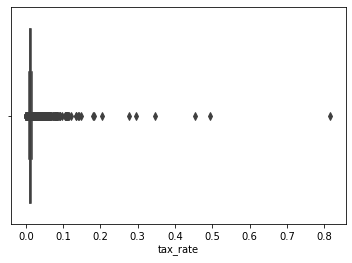

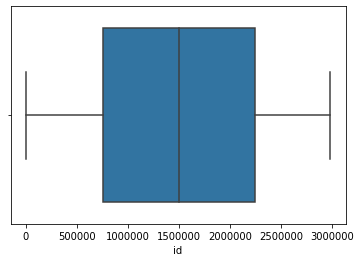

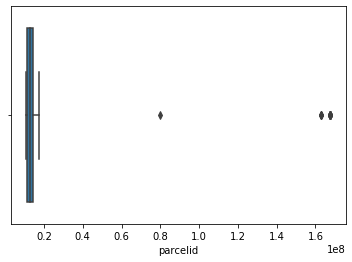

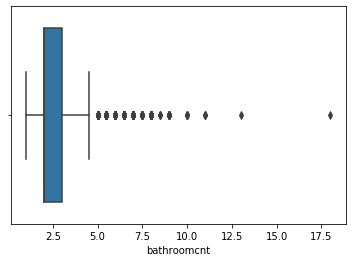

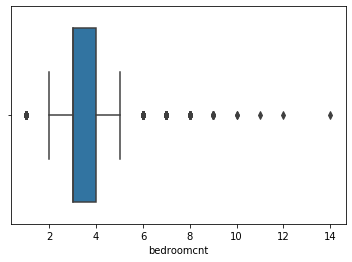

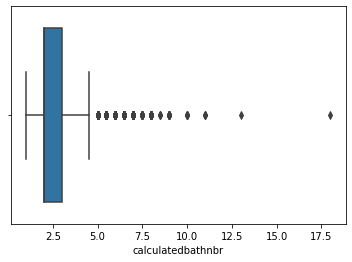

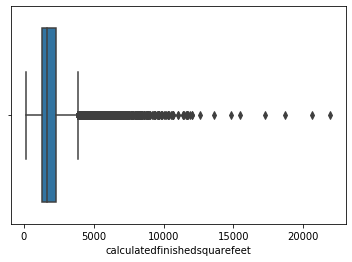

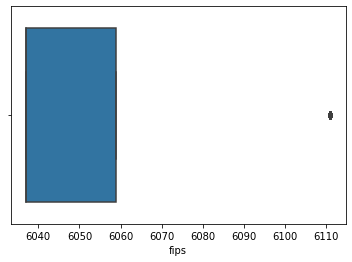

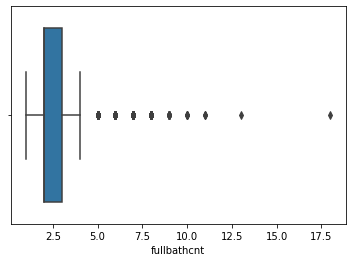

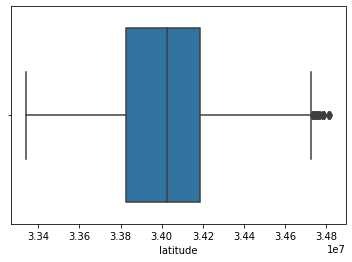

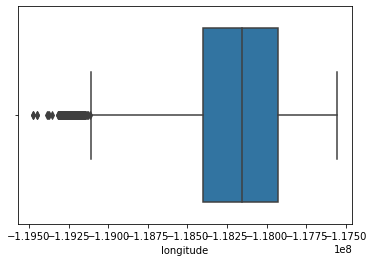

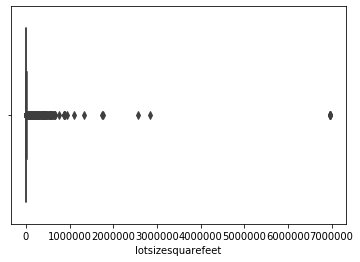

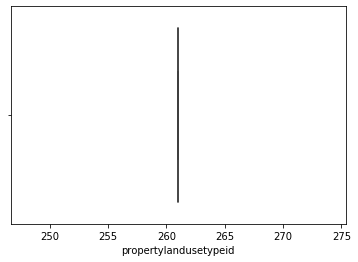

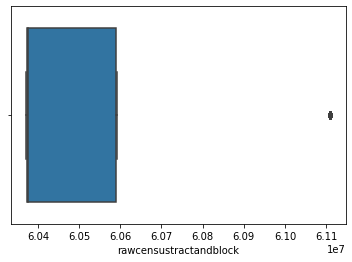

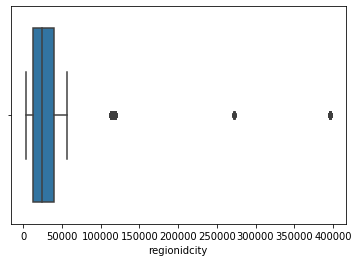

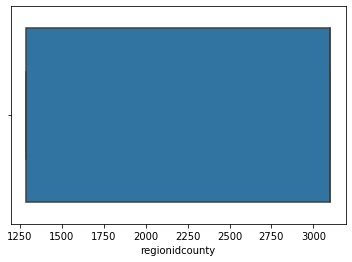

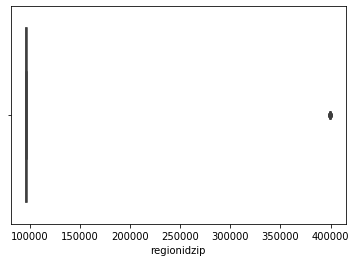

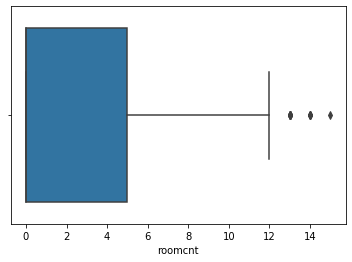

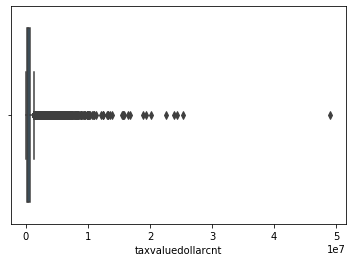

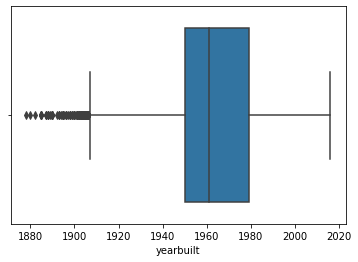

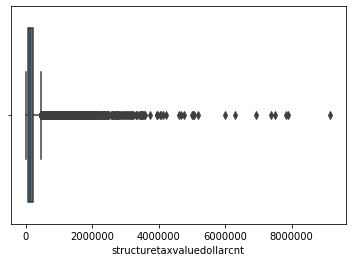

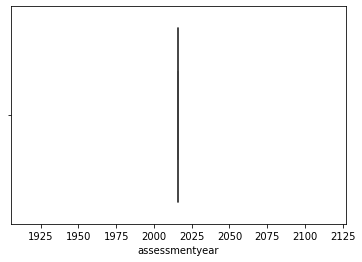

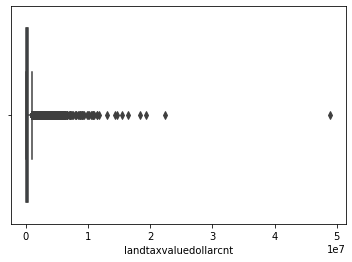

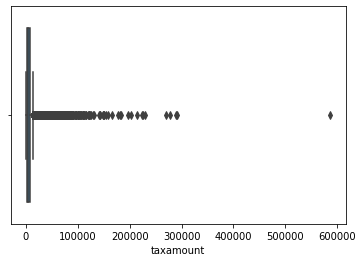

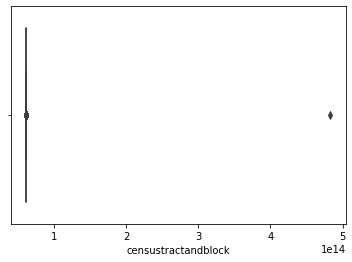

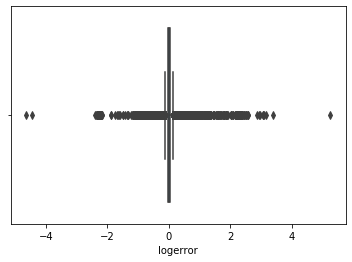

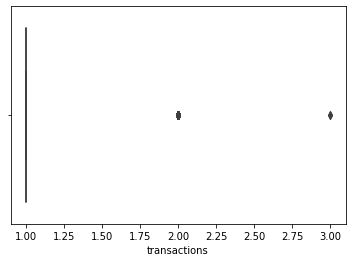

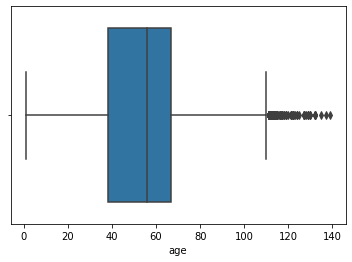

In [12]:
# visualize the columns with boxplot
# identify outliers visually
explore.df_feature_box(df)

The 'heatingorsystemtypeid', 'heatingorsystemdesc' and 'propertyzoningdesc' have significantly less values than the other values, but not so much so that they were removed with the function. We will just take note of this if we need to reference that leter on.

In [ ]:
def df_feature_dist(df):
    # get a list of columns where content is number
    features_num = list(df.select_dtypes(np.number).columns)
    for feature in features_num:
        sns.distplot(df[feature].dropna())
        plt.show()

In [ ]:
df_feature_dist(df)